## Importing the Libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Getting the Data

In [2]:
df=pd.read_csv("train.csv")

## Data Exploration/Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Age

In [12]:
#replacing age null value with mean values
m=df.Age.mean()

In [13]:
def impute_nan(df,variable,m):
    df[variable+"_new"]=df[variable].fillna(m)

In [14]:
impute_nan(df,'Age',m)

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_new          0
dtype: int64

In [16]:
df['Age_new'].mean()

29.699117647058763

In [17]:
df['Age'].mean()

29.69911764705882

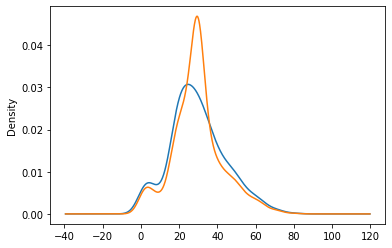

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_new'].plot(kind='kde',ax=ax)

In [19]:
df.drop(columns='Age',axis=1,inplace=True )

In [21]:
df.head(12)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.000000
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,S,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,NaN,S,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,NaN,S,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,NaN,C,14.000000


## Embarked

In [22]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df.drop(columns='Embarked',axis=1,inplace=True)

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Age_new          0
dtype: int64

## Cabin

In [26]:
df['Cabin'].fillna('Missing',inplace=True)

In [27]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Age_new
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,M,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,M,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,M,35.0


In [29]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [30]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [31]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [32]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [33]:
enumerate(ordinal_labels,0)

In [34]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [35]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Age_new,Cabin_ordinal_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,M,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0,4
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,M,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C,35.0,4
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,M,35.0,1


In [36]:
df.drop('Cabin',axis=1,inplace=True)

## Fare

In [40]:
data = [df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              891 non-null    int64  
 1   Pclass                891 non-null    int64  
 2   Name                  891 non-null    object 
 3   Sex                   891 non-null    object 
 4   SibSp                 891 non-null    int64  
 5   Parch                 891 non-null    int64  
 6   Ticket                891 non-null    object 
 7   Fare                  891 non-null    int32  
 8   Age_new               891 non-null    float64
 9   Cabin_ordinal_labels  891 non-null    int64  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 66.3+ KB


## Sex:
Convert ‘Sex’ feature into numeric.

In [42]:
genders = {"male": 0, "female": 1}
data = [df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [43]:
df.head(4)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age_new,Cabin_ordinal_labels
0,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7,22.0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71,38.0,4
2,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7,26.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53,35.0,4


## Ticket:

In [45]:
df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [46]:
df =df.drop(['Ticket'], axis=1)

## Name & Passenger Id

In [49]:
df['Name'].describe()

count                             891
unique                            891
top       Harris, Mr. Henry Birkhardt
freq                                1
Name: Name, dtype: object

In [50]:
df=df.drop(['Name'],axis=1)

In [ ]:
df=df.drop(['PassengerId'],axis=1)

In [51]:
df.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_new,Cabin_ordinal_labels
0,0,3,0,1,0,7,22.0,1
1,1,1,1,1,0,71,38.0,4
2,1,3,1,0,0,7,26.0,1
3,1,1,1,1,0,53,35.0,4
4,0,3,0,0,0,8,35.0,1


In [53]:
x=df.drop('Survived',axis=1)

In [54]:
y=df['Survived']

In [56]:
x.shape

(891, 7)

In [57]:
y.shape

(891,)

## spliting dataset

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.25)

In [59]:
x_train.shape

(668, 7)

In [60]:
y_train.shape

(668,)

## preprocessing 

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()

In [63]:
x_test=scaler.fit_transform(x_test)

In [64]:
x_train=scaler.fit_transform(x_train)

## Building Machine Learning Models
Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

## Random Forest:

In [65]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

## Logistic Regression:

In [68]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

## K Nearest Neighbor:

In [69]:
 knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

## Linear Support Vector Machine:

In [70]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Decision Tree

In [71]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test) 
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

## Gaussian Naive Bayes:

In [72]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train) 
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

## Which is the best Model ?

In [75]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression','KNN','Linear Support Vector Machine' 
              , 'Decision Tree','Naive Bayes', 
              ],
    'Score': [acc_random_forest,acc_log, acc_knn,acc_linear_svc,  
               acc_decision_tree,acc_gaussian,]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
96.86,Random Forest
96.86,Decision Tree
88.77,KNN
80.99,Logistic Regression
80.99,Linear Support Vector Machine
78.74,Naive Bayes
